# RVM regression demo

RVM error on test set is 0.995388061194, number of relevant vectors is 22


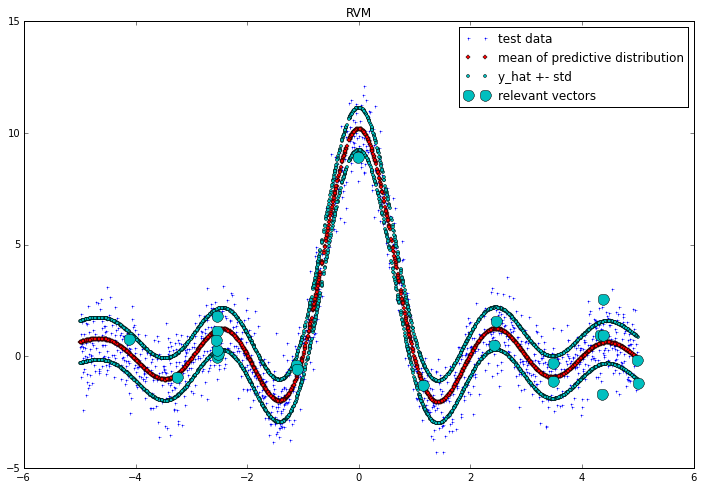

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from rvm import SparseBayesianLearner
from sklearn.metrics import mean_squared_error
%matplotlib inline


# parameters
n = 3000

# generate data set
np.random.seed(0)
Xc       = np.ones([n,1])
Xc[:,0]  = np.linspace(-5,5,n)
Yc       = 10*np.sinc(Xc[:,0]) + np.random.normal(0,1,n)
X,x,Y,y  = train_test_split(Xc,Yc,test_size = 0.5, random_state = 0)


# train rvm with fixed-point optimization
rvm = SparseBayesianLearner(learn_type = "regression", 
                            method     = "fixed-point",
                            alpha_max  = 10,
                            kernel     = "gaussian",
                            scaler     = 1)
rvm.fit(X,Y)
y_hat,var = rvm.predictive_distribution(x)
rvm_err   = mean_squared_error(y_hat,y)
rvs       = np.sum(rvm.active[1:])
print "RVM error on test set is {0}, number of relevant vectors is {1}".format(rvm_err, rvs)

# plot test vs predicted data
plt.figure(figsize = (12,8))
plt.plot(x[:,0],y,"b+",markersize = 3, label = "test data")
plt.plot(x[:,0],y_hat,"rD", markersize = 3, label = "mean of predictive distribution")
# plot one standard deviation bounds
plt.plot(x[:,0],y_hat + np.sqrt(var),"co", markersize = 3, label = "y_hat +- std")
plt.plot(x[:,0],y_hat - np.sqrt(var),"co", markersize = 3)
plt.plot(rvm.Xraw[rvm.active[1:]][:,0],Y[rvm.active[1:]],"co",markersize = 11,  label = "relevant vectors")
plt.legend()
plt.title("RVM")
plt.show()
